#Inisiasi Environment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
testDataDownloaded = drive.CreateFile({'id':'199_XlJUYVFuay2LsBIwmdrOOYMyXyDgw'})
testDataDownloaded.GetContentFile('test.csv')

trainDataDownloaded = drive.CreateFile({'id':'1z9gTZUezTthvNrVOhutwbS9YL2-3VtEO'})
trainDataDownloaded.GetContentFile('train.csv')

#Data Understanding

In [ ]:
test_raw = pd.read_csv('test.csv')
test_raw.head()

,id,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,has_secondary_use,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material
0,0,2,7,418 ft^2,14,Flat,Clay mortar-Stone/Brick,Bamboo/TImber-Light Roof,Clay,TImber/Bamboo-Mud,...,0.0,0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5,2
1,1,3.00,13,396 ft^2,21,Flat,Clay mortar-Stone/Brick,Bamboo/TImber-Heavy Roof,Brick or Stone,TImber/Bamboo-Mud,...,0.0,0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5,2
2,2,Floor-three,40,400 ft^2,18,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,Wood or Bamboo Mud,...,0.0,0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5,2
3,3,floor second,25,378 ft^2,20,Flat,Bamboo or Timber,Bamboo/Timber Heavy roof,mud,TImber/Bamboo-Mud,...,0.0,0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5,2
4,4,just 2 floor,5,375 ft^2,20,Flat,Mud mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,Wood-Mud or Bamboo Mud,...,0.0,0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5,2


In [ ]:
train_raw = pd.read_csv('train.csv')
train_raw.head()

<ipython-input-6-5f3bdbb67608>:1: DtypeWarning: Columns (1,3,5,6,7,8,9,10,11,12,13,16,17,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  train_raw = pd.read_csv('train.csv')


,Unnamed: 0,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,0,floor two,1.0,256 ft^2,22.0,Flat,Bamboo or Timber,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,1,Floor 3,3.0,985 ft^2,18.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Heavy Roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
2,2,Two Floor,7.0,NaN,14.0,Flat,Mud mortar-Stone/Brick,NaN,Clay,Wood-Mud or Bamboo Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,3,two,18.0,185 ft^2,15.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Wood Light Roof or Bamboo Light Roof,Clay,TImber/Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
4,4,just 2 floor,22.0,290 ft^2,17.0,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo or Timber Light roof,Clay,Timber Mud or Bamboo-Mud,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,1.0


In [ ]:
test_raw.shape

(242082, 24)

In [ ]:
train_raw.shape

(722815, 25)

In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])
    
    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
check_values(test_raw)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.0,242082,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,floors_before_eq (total),object,0,0.0,45,"[2, 3.00, Floor-three, floor second, just 2 f..."
2,old_building,int64,0,0.0,144,"[7, 13, 40, 25, 5, 6, 10, 17, 31, 18, 44, 2, 1..."
3,plinth_area (ft^2),object,0,0.0,928,"[418 ft^2, 396 ft^2, 400 ft^2, 378 ft^2, 375 f..."
4,height_before_eq (ft),int64,0,0.0,71,"[14, 21, 18, 20, 15, 16, 22, 12, 17, 10, 30, 9..."
5,land_surface_condition,object,0,0.0,3,"[Flat, Moderate slope, Steep slope]"
6,type_of_foundation,object,0,0.0,12,"[Clay mortar-Stone/Brick, Bamboo or Timber, Mu..."
7,type_of_roof,object,0,0.0,12,"[Bamboo/TImber-Light Roof, Bamboo/TImber-Heavy..."
8,type_of_ground_floor,object,0,0.0,15,"[Clay, Brick or Stone, mud, RC, Mud, reinforce..."
9,type_of_other_floor,object,0,0.0,11,"[TImber/Bamboo-Mud, Wood or Bamboo Mud, Wood-M..."


In [ ]:
check_values(train_raw)

,kolom,dataType,null,nullPercentage,unique,values
0,Unnamed: 0,int64,0,0.00,520011,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,floors_before_eq (total),object,332806,46.04,47,"[floor two, Floor 3, Two Floor, two, just 2 f..."
2,old_building,float64,239204,33.09,160,"[1.0, 3.0, 7.0, 18.0, 22.0, nan, 33.0, 40.0, 2..."
3,plinth_area (ft^2),object,421208,58.27,930,"[256 ft^2, 985 ft^2, nan, 185 ft^2, 290 ft^2, ..."
4,height_before_eq (ft),float64,332806,46.04,77,"[22.0, 18.0, 14.0, 15.0, 17.0, nan, 16.0, 9.0,..."
5,land_surface_condition,object,301606,41.73,3,"[Flat, nan, Moderate slope, Steep slope]"
6,type_of_foundation,object,239204,33.09,12,"[Bamboo or Timber, Clay Sand Mixed mortar-Ston..."
7,type_of_roof,object,421208,58.27,12,"[Bamboo/Timber Light roof, Wood Light Roof or ..."
8,type_of_ground_floor,object,332806,46.04,15,"[Clay, nan, Mud, Brick or Stone, Reinforced Co..."
9,type_of_other_floor,object,301606,41.73,11,"[TImber/Bamboo-Mud, Wood-Mud or Bamboo Mud, Ti..."


In [ ]:
train_raw.describe()

,Unnamed: 0,old_building,height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,wall_binding,wall_material,damage_grade
count,722815.000000,483611.000000,390009.000000,525211.000000,431609.000000,660415.000000,494011.000000,722815.000000
mean,259955.144135,24.342800,16.047158,0.121279,0.072369,4.266729,1.738795,3.643872
std,150088.828380,64.963571,5.527362,0.326451,0.318483,1.667539,0.646120,1.342427
min,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,129983.500000,9.000000,12.000000,0.000000,0.000000,5.000000,2.000000,3.000000
50%,259983.000000,16.000000,16.000000,0.000000,0.000000,5.000000,2.000000,4.000000
75%,389922.000000,27.000000,18.000000,0.000000,0.000000,5.000000,2.000000,5.000000
max,520010.000000,999.000000,99.000000,1.000000,3.000000,7.000000,3.000000,5.000000


# Data Cleaning

##Handle Name

In [ ]:
train_raw.rename(columns = {'Unnamed: 0':'id'}, inplace = True)
train_raw.rename(columns = {'position':'no_building_attached'}, inplace = True)
test_raw.rename(columns = {'position':'no_building_attached'}, inplace = True)

##Handle Inaccurate Data Train

In [ ]:
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('1', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '1'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('one', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '1'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('two', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '2'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('second', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '2'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('2', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '2'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('three', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '3'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('3', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '3'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('third', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '3'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('four', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '4'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('4', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '4'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('fifth', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '5'
train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
                                        .str
                                        .contains('five', case=False, regex=False)) & (train_raw['floors_before_eq (total)'].notna()))] = '5'

<ipython-input-14-188bb7265687>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
<ipython-input-14-188bb7265687>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_raw['floors_before_eq (total)'][((train_raw['floors_before_eq (total)']
<ipython-input-14-188bb7265687>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_raw['floors_before_eq (total)'][((

In [ ]:
train_raw['plinth_area (ft^2)'].replace('More than 1000 ft^2', '1001', inplace=True)
train_raw['plinth_area (ft^2)'] = train_raw[(train_raw['plinth_area (ft^2)'] != 'More than 1000 ft^2')]['plinth_area (ft^2)'].str.split(' ').str[0]

In [ ]:
train_raw['type_of_foundation'].replace('Bamboo/TImber', 'Bamboo or Timber', inplace=True)
train_raw['type_of_foundation'].replace('Bamboo/Timber', 'Bamboo or Timber', inplace=True)
train_raw['type_of_foundation'].replace('RC', 'Reinforced Concrete', inplace=True)
train_raw['type_of_foundation'].replace('Cement-Stone/Brick', 'Cement-Stone or Cement-Brick', inplace=True)
train_raw['type_of_foundation'].replace('Other', 'Others', inplace=True)

In [ ]:
train_raw['type_of_roof'].replace('Bamboo/Timber Light roof', 'Bamboo or Timber Light roof', inplace=True)
train_raw['type_of_roof'].replace('Bamboo/TImber-Light Roof', 'Bamboo or Timber Light roof', inplace=True)
train_raw['type_of_roof'].replace('Bamboo/Timber Heavy roof', 'Bamboo or Timber Heavy roof', inplace=True)
train_raw['type_of_roof'].replace('Bamboo/TImber-Heavy Roof', 'Bamboo or Timber Heavy roof', inplace=True)
train_raw['type_of_roof'].replace('Reinforced brick concrete/rcc/rbc', 'Reinforced Brick Concrete', inplace=True)
train_raw['type_of_roof'].replace('Reinforced Brick Slab/rcc/rbc', 'Reinforced Brick Concrete', inplace=True)
train_raw['type_of_roof'].replace('reinforced cement concrete/rb/rbc', 'Reinforced Cement Concrete', inplace=True)
train_raw['type_of_roof'].replace('rcc/rb/rbc', 'Reinforced Cement Concrete', inplace=True)

In [ ]:
train_raw['type_of_ground_floor'].replace('mud', 'Mud', inplace=True)
train_raw['type_of_ground_floor'].replace('reinforced concrete', 'Reinforced Concrete', inplace=True)
train_raw['type_of_ground_floor'].replace('RC', 'Reinforced Concrete', inplace=True)
train_raw['type_of_ground_floor'].replace('Brick/Stone', 'Brick or Stone', inplace=True)
train_raw['type_of_ground_floor'].replace('TImber', 'Timber', inplace=True)
train_raw['type_of_ground_floor'].replace('soil, water, loam Mixed', 'Soil, Water, Loam Mixed', inplace=True)

In [ ]:
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'TImber/Bamboo-Mud', 'Timber/Bamboo-Mud', inplace=True)
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'Wood-Mud or Bamboo Mud', 'Wood-Mud/Bamboo-Mud', inplace=True)
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'Timber Mud or Bamboo-Mud', 'Timber-Mud/Bamboo-Mud', inplace=True)
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'Not applicable', 'Not Applicable', inplace=True)
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'Wood or Bamboo Mud', 'Wood/Bamboo-Mud', inplace=True)
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'rcc/rb/rbc', 'RCC/RB/RBC', inplace=True)
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'Reinforced brick concrete/rcc/rbc', 'RCC/RB/RBC', inplace=True)
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'reinforced cement concrete/rb/rbc', 'RCC/RB/RBC', inplace=True)
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'reinforced cement concrete/rb/rbc', 'RCC/RB/RBC', inplace=True)
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'Timber-Planck', 'Timber-Plank', inplace=True)
train_raw['type_of_other_floor'].mask(train_raw['type_of_other_floor'] == 'Lumber-plank', 'Lumber-Plank', inplace=True)

In [ ]:
train_raw['legal_ownership_status'].mask(train_raw['legal_ownership_status'].isin(['Private Use', 'Prvt', 'Privste']), 'Private', inplace=True)
train_raw['legal_ownership_status'].mask(train_raw['legal_ownership_status'].isin(['Public Space', 'Public Use']), 'Public', inplace=True)
train_raw['legal_ownership_status'].mask(train_raw['legal_ownership_status'].isin(['Unknown']), 'Unspecified', inplace=True)
train_raw['legal_ownership_status'].mask(train_raw['legal_ownership_status'].isin(['Institutionals', 'Institutional Use']), 'Institutional', inplace=True)

In [ ]:
train_raw['residential_type'].mask(train_raw['residential_type'].isin(['Non-residential', 'Hotel/Motel']), 'Non-residential', inplace=True)
train_raw['residential_type'].mask(train_raw['residential_type'].isin(['Rental Residential', 'Housing', 'Other Residential Type']), 'Residential', inplace=True)

In [ ]:
train_raw['no_building_attached'].mask(train_raw['no_building_attached'].isin(['Not attached']), 0, inplace=True)
train_raw['no_building_attached'].mask(train_raw['no_building_attached'].isin(['Attached-1 side']), 1, inplace=True)
train_raw['no_building_attached'].mask(train_raw['no_building_attached'].isin(['Attached-2 side']), 2, inplace=True)
train_raw['no_building_attached'].mask(train_raw['no_building_attached'].isin(['Attached-3 side']), 3, inplace=True)

In [ ]:
train_raw['no_family_residing'].mask(train_raw['no_family_residing'].isin(['None']), 0, inplace=True)

In [ ]:
train_raw['public_place_type'].mask(train_raw['public_place_type'].isin(['Religious Sites', 'Other Institutional Building', 'Drugstore', 'Health Clinics', 'Shopping Sites', 'Hospital', 'High School', 'University', 'Middle School', 'Primary School', 'Recreational Park', 'Museum']), 'Public', inplace=True)

In [ ]:
train_raw['industrial_use_type'].mask(train_raw['industrial_use_type'].isin(['Metallurgy', 'Service/Tourism', 'Food', 'Manufacturing', 'Infrastructure', 'Agro', 'Farm', 'Forest-based']), 'Industrial', inplace=True)

In [ ]:
train_raw['govermental_use_type'].mask(train_raw['govermental_use_type'].isin(['Police Offices', 'Govermental Buildings']), 'Govermental', inplace=True)

In [ ]:
check_values(train_raw)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.00,520011,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,floors_before_eq (total),object,332806,46.04,9,"[2, 3, nan, 1, 5, 4, 6, 8, 9, 7]"
2,old_building,float64,239204,33.09,160,"[1.0, 3.0, 7.0, 18.0, 22.0, nan, 33.0, 40.0, 2..."
3,plinth_area (ft^2),object,421208,58.27,930,"[256, 985, nan, 185, 290, 504, 616, 600, 500, ..."
4,height_before_eq (ft),float64,332806,46.04,77,"[22.0, 18.0, 14.0, 15.0, 17.0, nan, 16.0, 9.0,..."
5,land_surface_condition,object,301606,41.73,3,"[Flat, nan, Moderate slope, Steep slope]"
6,type_of_foundation,object,239204,33.09,7,"[Bamboo or Timber, Clay Sand Mixed mortar-Ston..."
7,type_of_roof,object,421208,58.27,6,"[Bamboo or Timber Light roof, Wood Light Roof ..."
8,type_of_ground_floor,object,332806,46.04,10,"[Clay, nan, Mud, Brick or Stone, Reinforced Co..."
9,type_of_other_floor,object,301606,41.73,9,"[Timber/Bamboo-Mud, Wood-Mud/Bamboo-Mud, Timbe..."


##Handle Inaccurate Data Test

In [ ]:
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('1', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '1'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('one', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '1'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('two', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '2'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('second', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '2'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('2', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '2'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('three', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '3'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('3', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '3'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('third', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '3'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('four', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '4'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('4', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '4'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('fifth', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '5'
test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
                                        .str
                                        .contains('five', case=False, regex=False)) & (test_raw['floors_before_eq (total)'].notna()))] = '5'

<ipython-input-28-43536bb9780a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
<ipython-input-28-43536bb9780a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_raw['floors_before_eq (total)'][((test_raw['floors_before_eq (total)']
<ipython-input-28-43536bb9780a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_raw['floors_before_eq (total)'][((test_

In [ ]:
test_raw['plinth_area (ft^2)'].replace('More than 1000 ft^2', '1001', inplace=True)
test_raw['plinth_area (ft^2)'] = test_raw[(test_raw['plinth_area (ft^2)'] != 'More than 1000 ft^2')]['plinth_area (ft^2)'].str.split(' ').str[0]

In [ ]:
test_raw['type_of_foundation'].replace('Bamboo/TImber', 'Bamboo or Timber', inplace=True)
test_raw['type_of_foundation'].replace('Bamboo/Timber', 'Bamboo or Timber', inplace=True)
test_raw['type_of_foundation'].replace('RC', 'Reinforced Concrete', inplace=True)
test_raw['type_of_foundation'].replace('Cement-Stone/Brick', 'Cement-Stone or Cement-Brick', inplace=True)
test_raw['type_of_foundation'].replace('Other', 'Others', inplace=True)

In [ ]:
test_raw['type_of_roof'].replace('Bamboo/Timber Light roof', 'Bamboo or Timber Light roof', inplace=True)
test_raw['type_of_roof'].replace('Bamboo/TImber-Light Roof', 'Bamboo or Timber Light roof', inplace=True)
test_raw['type_of_roof'].replace('Bamboo/Timber Heavy roof', 'Bamboo or Timber Heavy roof', inplace=True)
test_raw['type_of_roof'].replace('Bamboo/TImber-Heavy Roof', 'Bamboo or Timber Heavy roof', inplace=True)
test_raw['type_of_roof'].replace('Reinforced brick concrete/rcc/rbc', 'Reinforced Brick Concrete', inplace=True)
test_raw['type_of_roof'].replace('Reinforced Brick Slab/rcc/rbc', 'Reinforced Brick Concrete', inplace=True)
test_raw['type_of_roof'].replace('reinforced cement concrete/rb/rbc', 'Reinforced Cement Concrete', inplace=True)
test_raw['type_of_roof'].replace('rcc/rb/rbc', 'Reinforced Cement Concrete', inplace=True)

In [ ]:
test_raw['type_of_ground_floor'].replace('mud', 'Mud', inplace=True)
test_raw['type_of_ground_floor'].replace('reinforced concrete', 'Reinforced Concrete', inplace=True)
test_raw['type_of_ground_floor'].replace('RC', 'Reinforced Concrete', inplace=True)
test_raw['type_of_ground_floor'].replace('Brick/Stone', 'Brick or Stone', inplace=True)
test_raw['type_of_ground_floor'].replace('TImber', 'Timber', inplace=True)
test_raw['type_of_ground_floor'].replace('soil, water, loam Mixed', 'Soil, Water, Loam Mixed', inplace=True)

In [ ]:
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'TImber/Bamboo-Mud', 'Timber/Bamboo-Mud', inplace=True)
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'Wood-Mud or Bamboo Mud', 'Wood-Mud/Bamboo-Mud', inplace=True)
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'Timber Mud or Bamboo-Mud', 'Timber-Mud/Bamboo-Mud', inplace=True)
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'Not applicable', 'Not Applicable', inplace=True)
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'Wood or Bamboo Mud', 'Wood/Bamboo-Mud', inplace=True)
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'rcc/rb/rbc', 'RCC/RB/RBC', inplace=True)
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'Reinforced brick concrete/rcc/rbc', 'RCC/RB/RBC', inplace=True)
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'reinforced cement concrete/rb/rbc', 'RCC/RB/RBC', inplace=True)
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'reinforced cement concrete/rb/rbc', 'RCC/RB/RBC', inplace=True)
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'Timber-Planck', 'Timber-Plank', inplace=True)
test_raw['type_of_other_floor'].mask(test_raw['type_of_other_floor'] == 'Lumber-plank', 'Lumber-Plank', inplace=True)

In [ ]:
test_raw['legal_ownership_status'].mask(test_raw['legal_ownership_status'].isin(['Private Use', 'Prvt', 'Privste']), 'Private', inplace=True)
test_raw['legal_ownership_status'].mask(test_raw['legal_ownership_status'].isin(['Public Space', 'Public Use']), 'Public', inplace=True)
test_raw['legal_ownership_status'].mask(test_raw['legal_ownership_status'].isin(['Unknown']), 'Unspecified', inplace=True)
test_raw['legal_ownership_status'].mask(test_raw['legal_ownership_status'].isin(['Institutionals', 'Institutional Use']), 'Institutional', inplace=True)

In [ ]:
test_raw['residential_type'].mask(test_raw['residential_type'].isin(['Non-residential', 'Hotel/Motel']), 'Non-residential', inplace=True)
test_raw['residential_type'].mask(test_raw['residential_type'].isin(['Rental Residential', 'Housing', 'Other Residential Type']), 'Residential', inplace=True)

In [ ]:
test_raw['no_building_attached'].mask(test_raw['no_building_attached'].isin(['Not attached']), 0, inplace=True)
test_raw['no_building_attached'].mask(test_raw['no_building_attached'].isin(['Attached-1 side']), 1, inplace=True)
test_raw['no_building_attached'].mask(test_raw['no_building_attached'].isin(['Attached-2 side']), 2, inplace=True)
test_raw['no_building_attached'].mask(test_raw['no_building_attached'].isin(['Attached-3 side']), 3, inplace=True)

In [ ]:
test_raw['no_family_residing'].mask(test_raw['no_family_residing'].isin(['None']), 0, inplace=True)

In [ ]:
test_raw['public_place_type'].mask(test_raw['public_place_type'].isin(['Religious Sites', 'Other Institutional Building', 'Drugstore', 'Health Clinics', 'Shopping Sites', 'Hospital', 'High School', 'University', 'Middle School', 'Primary School', 'Recreational Park', 'Museum']), 'Public', inplace=True)

In [ ]:
test_raw['industrial_use_type'].mask(test_raw['industrial_use_type'].isin(['Metallurgy', 'Service/Tourism', 'Food', 'Manufacturing', 'Infrastructure', 'Agro', 'Farm', 'Forest-based']), 'Industrial', inplace=True)

In [ ]:
test_raw['govermental_use_type'].mask(test_raw['govermental_use_type'].isin(['Police Offices', 'Govermental Buildings']), 'Govermental', inplace=True)

In [ ]:
check_values(test_raw)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.0,242082,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,floors_before_eq (total),object,0,0.0,8,"[2, 3, 1, 5, 4, 6, 7, 9]"
2,old_building,int64,0,0.0,144,"[7, 13, 40, 25, 5, 6, 10, 17, 31, 18, 44, 2, 1..."
3,plinth_area (ft^2),object,0,0.0,928,"[418, 396, 400, 378, 375, 534, 416, 558, 255, ..."
4,height_before_eq (ft),int64,0,0.0,71,"[14, 21, 18, 20, 15, 16, 22, 12, 17, 10, 30, 9..."
5,land_surface_condition,object,0,0.0,3,"[Flat, Moderate slope, Steep slope]"
6,type_of_foundation,object,0,0.0,7,"[Clay mortar-Stone/Brick, Bamboo or Timber, Mu..."
7,type_of_roof,object,0,0.0,6,"[Bamboo or Timber Light roof, Bamboo or Timber..."
8,type_of_ground_floor,object,0,0.0,10,"[Clay, Brick or Stone, Mud, Reinforced Concret..."
9,type_of_other_floor,object,0,0.0,9,"[Timber/Bamboo-Mud, Wood/Bamboo-Mud, Wood-Mud/..."


##Handle Data Type

In [ ]:
float_data = [
  'old_building',
  'floors_before_eq (total)',
  'height_before_eq (ft)',
  'no_building_attached',
  'has_secondary_use',
  'type_of_reinforcement_concrete',
  'wall_binding',
  'wall_material',
  'plinth_area (ft^2)',
  'no_family_residing'
  ]

for i in float_data:
    train_raw[i] = train_raw[i].astype(np.float64)
    test_raw[i] = test_raw[i].astype(np.float64)

train_raw['damage_grade'] = train_raw['damage_grade'].astype(int)
# test_raw['damage_grade'] = test_raw['damage_grade'].astype(int)

In [ ]:
check_values(train_raw)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.00,520011,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,floors_before_eq (total),float64,332806,46.04,9,"[2.0, 3.0, nan, 1.0, 5.0, 4.0, 6.0, 8.0, 9.0, ..."
2,old_building,float64,239204,33.09,160,"[1.0, 3.0, 7.0, 18.0, 22.0, nan, 33.0, 40.0, 2..."
3,plinth_area (ft^2),float64,421208,58.27,930,"[256.0, 985.0, nan, 185.0, 290.0, 504.0, 616.0..."
4,height_before_eq (ft),float64,332806,46.04,77,"[22.0, 18.0, 14.0, 15.0, 17.0, nan, 16.0, 9.0,..."
5,land_surface_condition,object,301606,41.73,3,"[Flat, nan, Moderate slope, Steep slope]"
6,type_of_foundation,object,239204,33.09,7,"[Bamboo or Timber, Clay Sand Mixed mortar-Ston..."
7,type_of_roof,object,421208,58.27,6,"[Bamboo or Timber Light roof, Wood Light Roof ..."
8,type_of_ground_floor,object,332806,46.04,10,"[Clay, nan, Mud, Brick or Stone, Reinforced Co..."
9,type_of_other_floor,object,301606,41.73,9,"[Timber/Bamboo-Mud, Wood-Mud/Bamboo-Mud, Timbe..."


In [ ]:
check_values(test_raw)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.0,242082,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,floors_before_eq (total),float64,0,0.0,8,"[2.0, 3.0, 1.0, 5.0, 4.0, 6.0, 7.0, 9.0]"
2,old_building,float64,0,0.0,144,"[7.0, 13.0, 40.0, 25.0, 5.0, 6.0, 10.0, 17.0, ..."
3,plinth_area (ft^2),float64,0,0.0,928,"[418.0, 396.0, 400.0, 378.0, 375.0, 534.0, 416..."
4,height_before_eq (ft),float64,0,0.0,71,"[14.0, 21.0, 18.0, 20.0, 15.0, 16.0, 22.0, 12...."
5,land_surface_condition,object,0,0.0,3,"[Flat, Moderate slope, Steep slope]"
6,type_of_foundation,object,0,0.0,7,"[Clay mortar-Stone/Brick, Bamboo or Timber, Mu..."
7,type_of_roof,object,0,0.0,6,"[Bamboo or Timber Light roof, Bamboo or Timber..."
8,type_of_ground_floor,object,0,0.0,10,"[Clay, Brick or Stone, Mud, Reinforced Concret..."
9,type_of_other_floor,object,0,0.0,9,"[Timber/Bamboo-Mud, Wood/Bamboo-Mud, Wood-Mud/..."


##Drop Duplicates

In [ ]:
train_raw.drop_duplicates(inplace=True)

##Handle Missing Data

In [ ]:
train_raw.drop(['technical_solution_proposed'], axis=1, inplace=True)
test_raw.drop(['technical_solution_proposed'], axis=1, inplace=True)
check_values(train_raw)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.0,520011,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,floors_before_eq (total),float64,166403,32.0,9,"[2.0, 3.0, nan, 1.0, 5.0, 4.0, 6.0, 8.0, 9.0, ..."
2,old_building,float64,119602,23.0,160,"[1.0, 3.0, 7.0, 18.0, 22.0, nan, 33.0, 40.0, 2..."
3,plinth_area (ft^2),float64,218404,42.0,930,"[256.0, 985.0, nan, 185.0, 290.0, 504.0, 616.0..."
4,height_before_eq (ft),float64,166403,32.0,77,"[22.0, 18.0, 14.0, 15.0, 17.0, nan, 16.0, 9.0,..."
5,land_surface_condition,object,150803,29.0,3,"[Flat, nan, Moderate slope, Steep slope]"
6,type_of_foundation,object,119602,23.0,7,"[Bamboo or Timber, Clay Sand Mixed mortar-Ston..."
7,type_of_roof,object,218404,42.0,6,"[Bamboo or Timber Light roof, Wood Light Roof ..."
8,type_of_ground_floor,object,166403,32.0,10,"[Clay, nan, Mud, Brick or Stone, Reinforced Co..."
9,type_of_other_floor,object,150803,29.0,9,"[Timber/Bamboo-Mud, Wood-Mud/Bamboo-Mud, Timbe..."


In [ ]:
train_raw.dropna(how = "any", axis = 0, inplace=True)
train_raw.shape

(301607, 24)

In [ ]:
check_values(train_raw)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.0,301607,"[0, 1, 3, 4, 7, 8, 9, 10, 15, 16, 20, 21, 22, ..."
1,floors_before_eq (total),float64,0,0.0,9,"[2.0, 3.0, 1.0, 5.0, 4.0, 6.0, 8.0, 9.0, 7.0]"
2,old_building,float64,0,0.0,158,"[1.0, 3.0, 18.0, 22.0, 40.0, 27.0, 33.0, 68.0,..."
3,plinth_area (ft^2),float64,0,0.0,930,"[256.0, 985.0, 185.0, 290.0, 504.0, 616.0, 600..."
4,height_before_eq (ft),float64,0,0.0,75,"[22.0, 18.0, 15.0, 17.0, 14.0, 9.0, 45.0, 16.0..."
5,land_surface_condition,object,0,0.0,3,"[Flat, Moderate slope, Steep slope]"
6,type_of_foundation,object,0,0.0,7,"[Bamboo or Timber, Clay Sand Mixed mortar-Ston..."
7,type_of_roof,object,0,0.0,6,"[Bamboo or Timber Light roof, Wood Light Roof ..."
8,type_of_ground_floor,object,0,0.0,10,"[Clay, Mud, Reinforced Concrete, Brick or Ston..."
9,type_of_other_floor,object,0,0.0,9,"[Timber/Bamboo-Mud, Timber-Mud/Bamboo-Mud, Not..."


##Handle Outliers

In [ ]:
max = train_raw[['old_building']].quantile(0.995, numeric_only = True)
train_raw = train_raw[(train_raw['old_building'] <= max['old_building'])]

##Cleaned Data

In [ ]:
train = train_raw
check_values(train)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.0,300098,"[0, 1, 3, 4, 7, 8, 9, 10, 15, 16, 20, 21, 22, ..."
1,floors_before_eq (total),float64,0,0.0,9,"[2.0, 3.0, 1.0, 5.0, 4.0, 6.0, 8.0, 9.0, 7.0]"
2,old_building,float64,0,0.0,126,"[1.0, 3.0, 18.0, 22.0, 40.0, 27.0, 33.0, 68.0,..."
3,plinth_area (ft^2),float64,0,0.0,930,"[256.0, 985.0, 185.0, 290.0, 504.0, 616.0, 600..."
4,height_before_eq (ft),float64,0,0.0,75,"[22.0, 18.0, 15.0, 17.0, 14.0, 9.0, 45.0, 16.0..."
5,land_surface_condition,object,0,0.0,3,"[Flat, Moderate slope, Steep slope]"
6,type_of_foundation,object,0,0.0,7,"[Bamboo or Timber, Clay Sand Mixed mortar-Ston..."
7,type_of_roof,object,0,0.0,6,"[Bamboo or Timber Light roof, Wood Light Roof ..."
8,type_of_ground_floor,object,0,0.0,10,"[Clay, Mud, Reinforced Concrete, Brick or Ston..."
9,type_of_other_floor,object,0,0.0,9,"[Timber/Bamboo-Mud, Timber-Mud/Bamboo-Mud, Not..."


In [ ]:
test = test_raw
check_values(test)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.0,242082,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,floors_before_eq (total),float64,0,0.0,8,"[2.0, 3.0, 1.0, 5.0, 4.0, 6.0, 7.0, 9.0]"
2,old_building,float64,0,0.0,144,"[7.0, 13.0, 40.0, 25.0, 5.0, 6.0, 10.0, 17.0, ..."
3,plinth_area (ft^2),float64,0,0.0,928,"[418.0, 396.0, 400.0, 378.0, 375.0, 534.0, 416..."
4,height_before_eq (ft),float64,0,0.0,71,"[14.0, 21.0, 18.0, 20.0, 15.0, 16.0, 22.0, 12...."
5,land_surface_condition,object,0,0.0,3,"[Flat, Moderate slope, Steep slope]"
6,type_of_foundation,object,0,0.0,7,"[Clay mortar-Stone/Brick, Bamboo or Timber, Mu..."
7,type_of_roof,object,0,0.0,6,"[Bamboo or Timber Light roof, Bamboo or Timber..."
8,type_of_ground_floor,object,0,0.0,10,"[Clay, Brick or Stone, Mud, Reinforced Concret..."
9,type_of_other_floor,object,0,0.0,9,"[Timber/Bamboo-Mud, Wood/Bamboo-Mud, Wood-Mud/..."


#EDA

<ipython-input-52-dcf56476b045>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


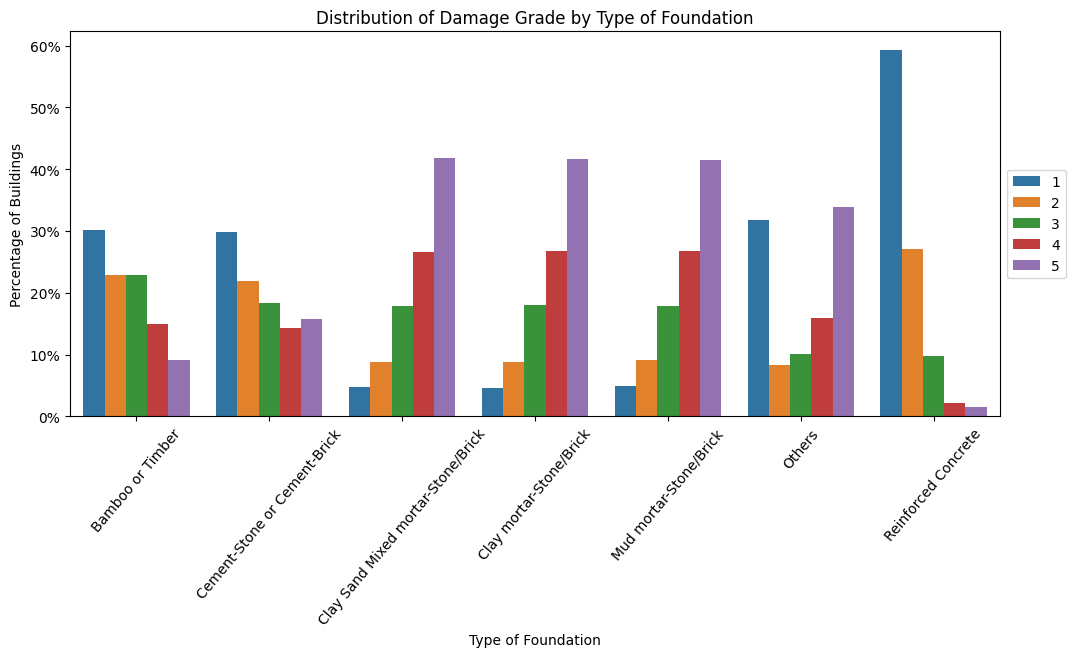

In [ ]:
df_temp = train_raw.groupby(['type_of_foundation','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['type_of_foundation', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'type_of_foundation', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Type of Foundation")
plt.xlabel("Type of Foundation")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-53-e322a9ce47c8>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


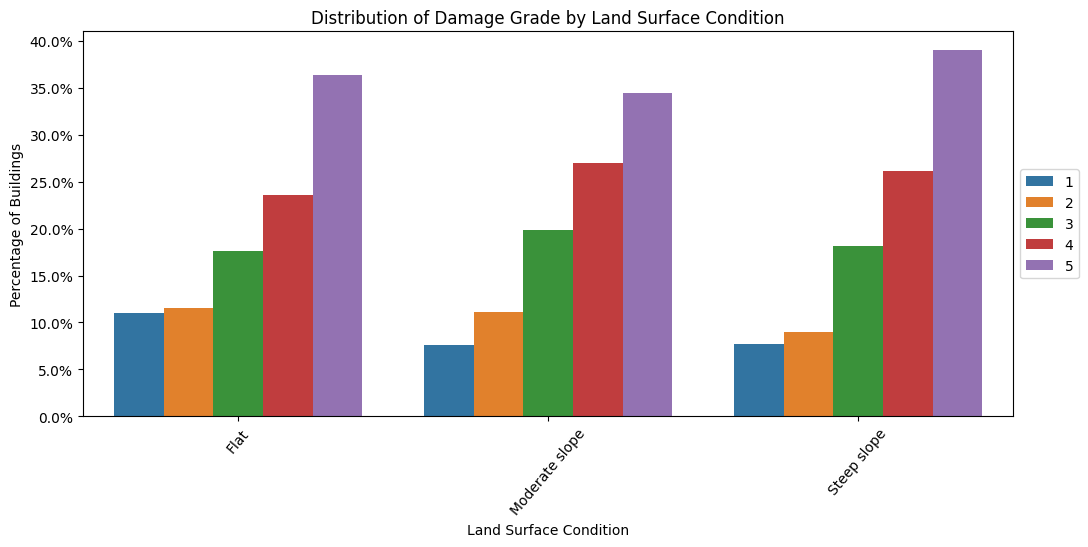

In [ ]:
df_temp = train_raw.groupby(['land_surface_condition','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['land_surface_condition', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'land_surface_condition', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Land Surface Condition")
plt.xlabel("Land Surface Condition")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-54-33c76589c87a>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


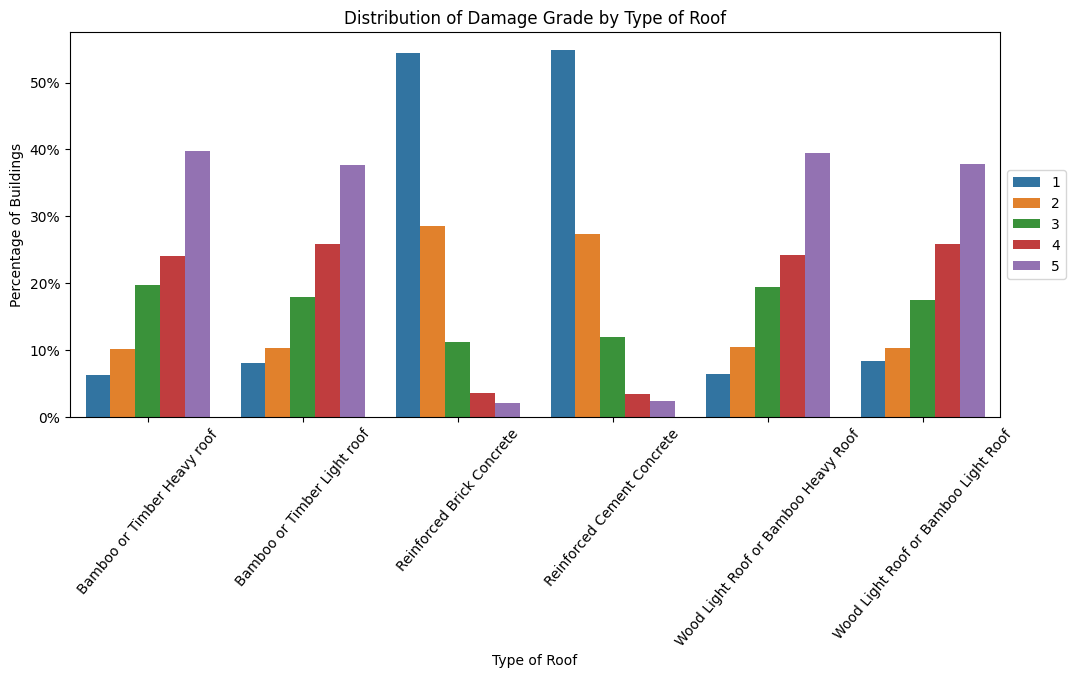

In [ ]:
df_temp = train_raw.groupby(['type_of_roof','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['type_of_roof', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'type_of_roof', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Type of Roof")
plt.xlabel("Type of Roof")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-55-aba7b6ce8d24>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


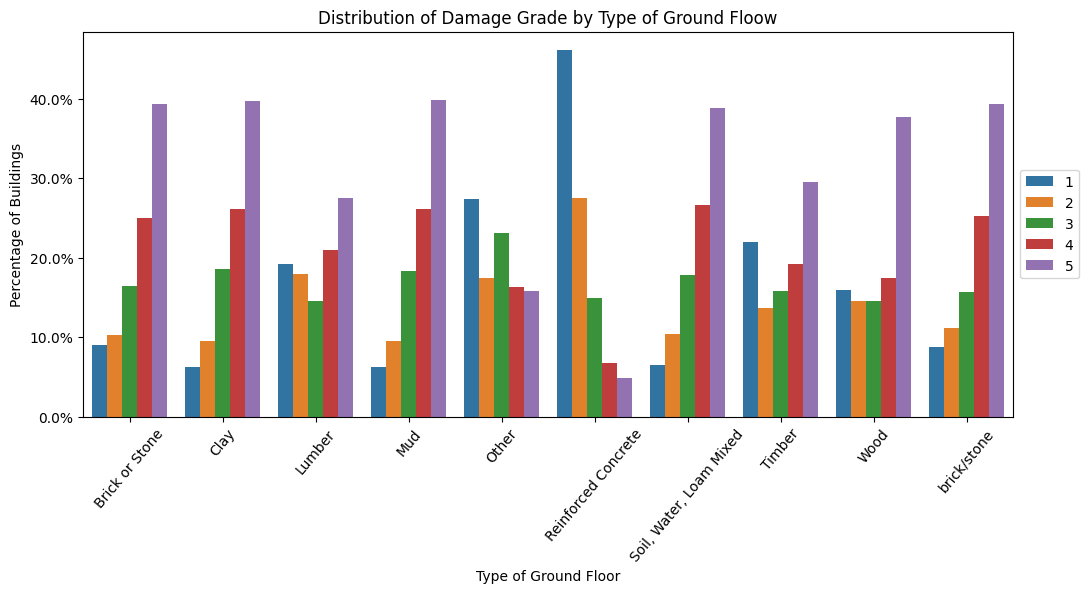

In [ ]:
df_temp = train_raw.groupby(['type_of_ground_floor','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['type_of_ground_floor', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'type_of_ground_floor', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Type of Ground Floow")
plt.xlabel("Type of Ground Floor")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-56-044e3f11c45b>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


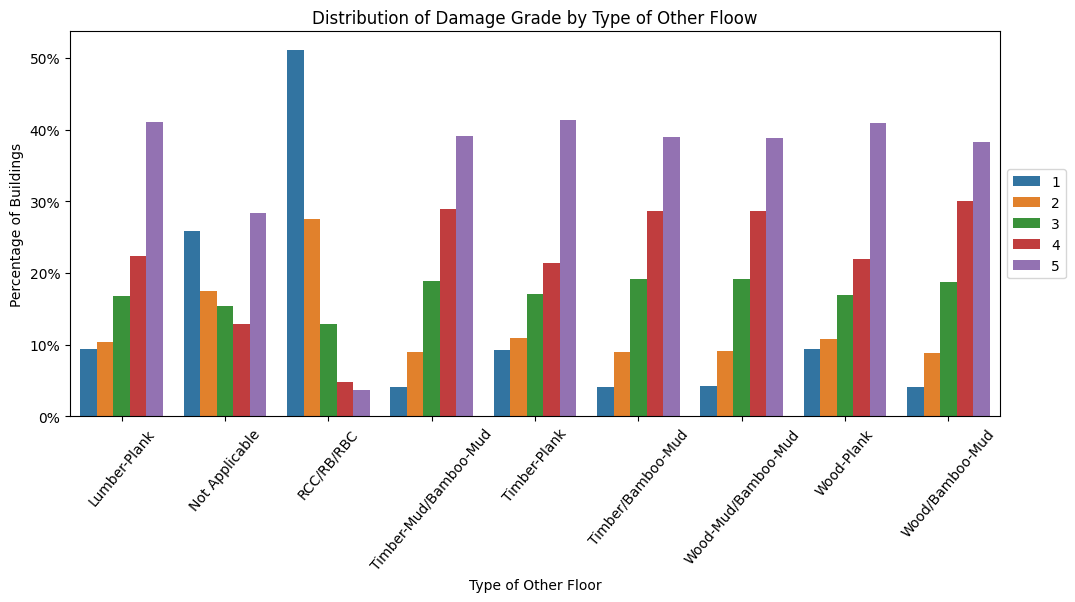

In [ ]:
df_temp = train_raw.groupby(['type_of_other_floor','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['type_of_other_floor', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'type_of_other_floor', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Type of Other Floow")
plt.xlabel("Type of Other Floor")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-57-6fb0ad213b4f>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


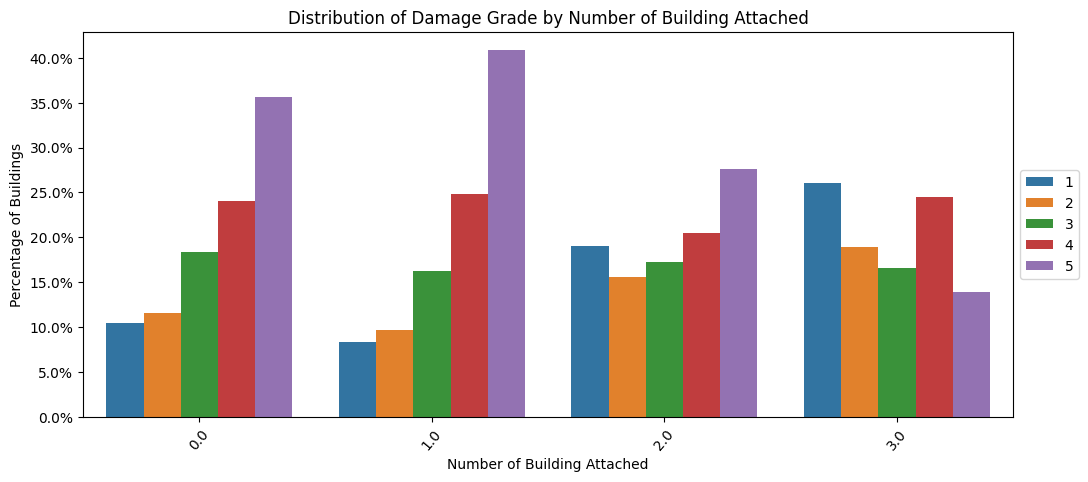

In [ ]:
df_temp = train_raw.groupby(['no_building_attached','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['no_building_attached', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'no_building_attached', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Number of Building Attached")
plt.xlabel("Number of Building Attached")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-58-2f0e899fb7a1>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


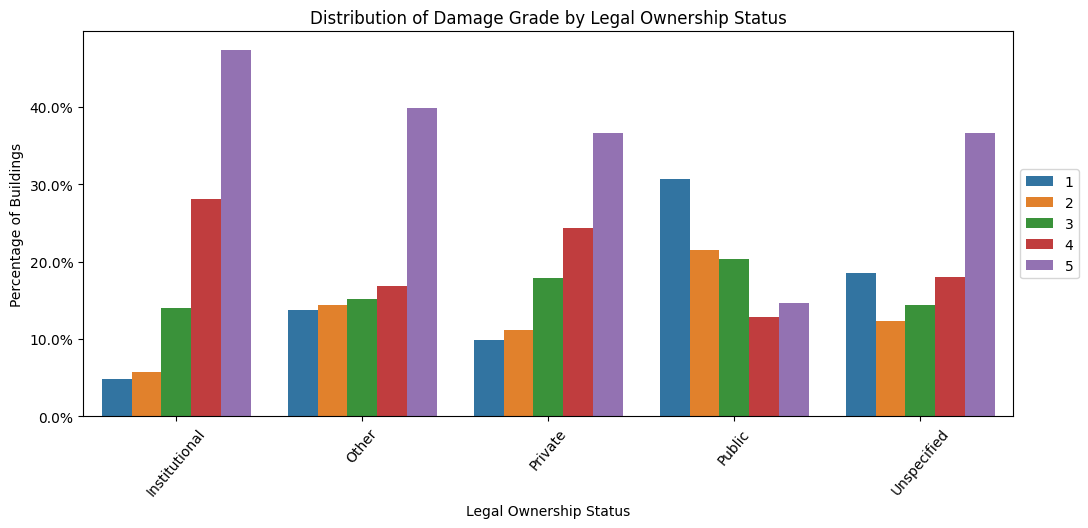

In [ ]:
df_temp = train_raw.groupby(['legal_ownership_status','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['legal_ownership_status', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'legal_ownership_status', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Legal Ownership Status")
plt.xlabel("Legal Ownership Status")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-59-3b2538b0552d>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


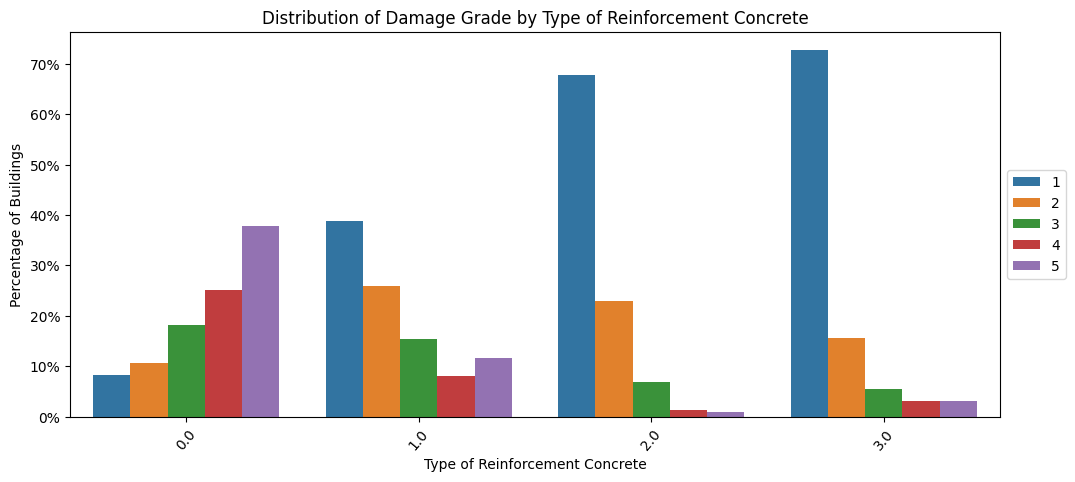

In [ ]:
df_temp = train_raw.groupby(['type_of_reinforcement_concrete','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['type_of_reinforcement_concrete', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'type_of_reinforcement_concrete', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Type of Reinforcement Concrete")
plt.xlabel("Type of Reinforcement Concrete")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-60-6cde1758e4a0>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


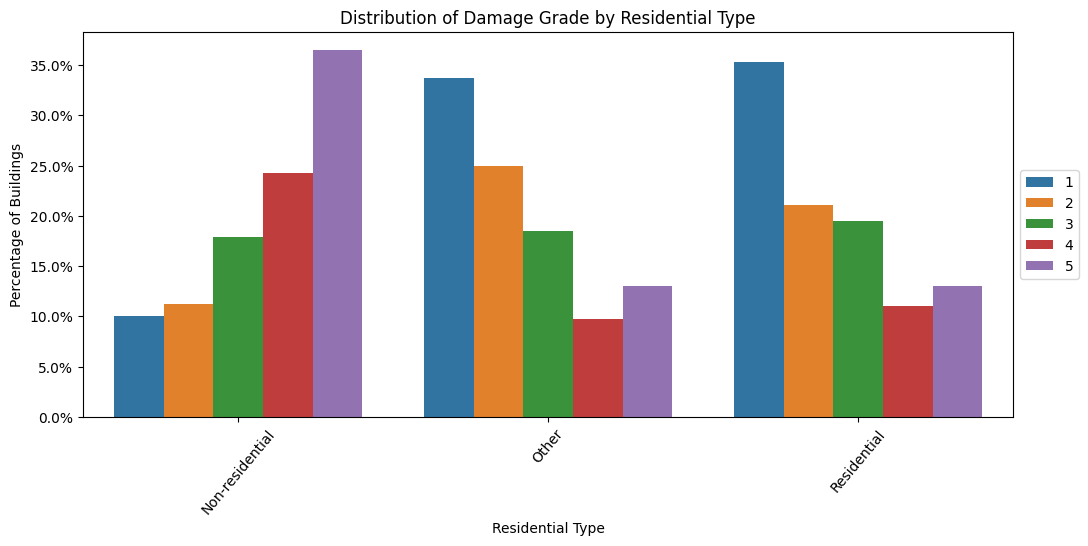

In [ ]:
df_temp = train_raw.groupby(['residential_type','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['residential_type', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'residential_type', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Residential Type")
plt.xlabel("Residential Type")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-61-efadd26133c9>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


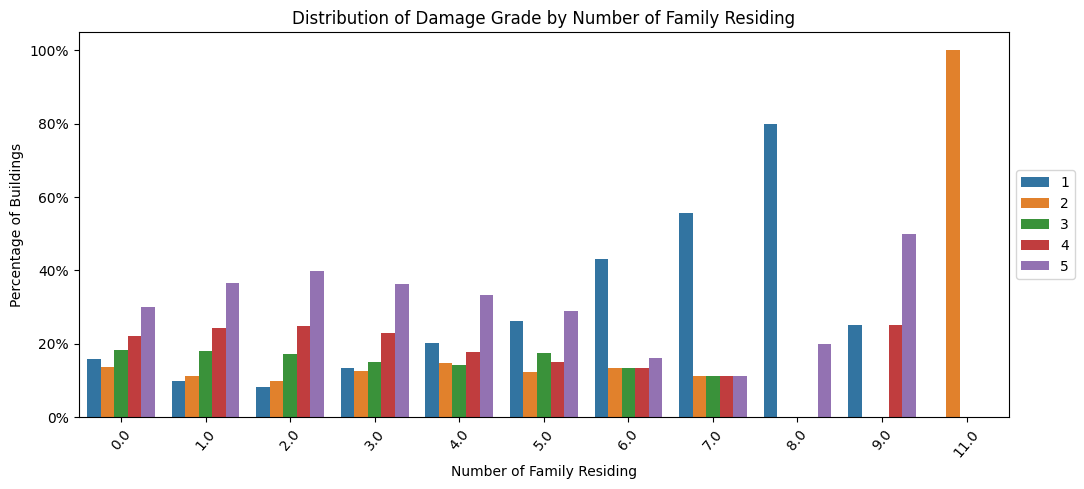

In [ ]:
df_temp = train_raw.groupby(['no_family_residing','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['no_family_residing', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'no_family_residing', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Number of Family Residing")
plt.xlabel("Number of Family Residing")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-62-ee92db4ff5f7>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


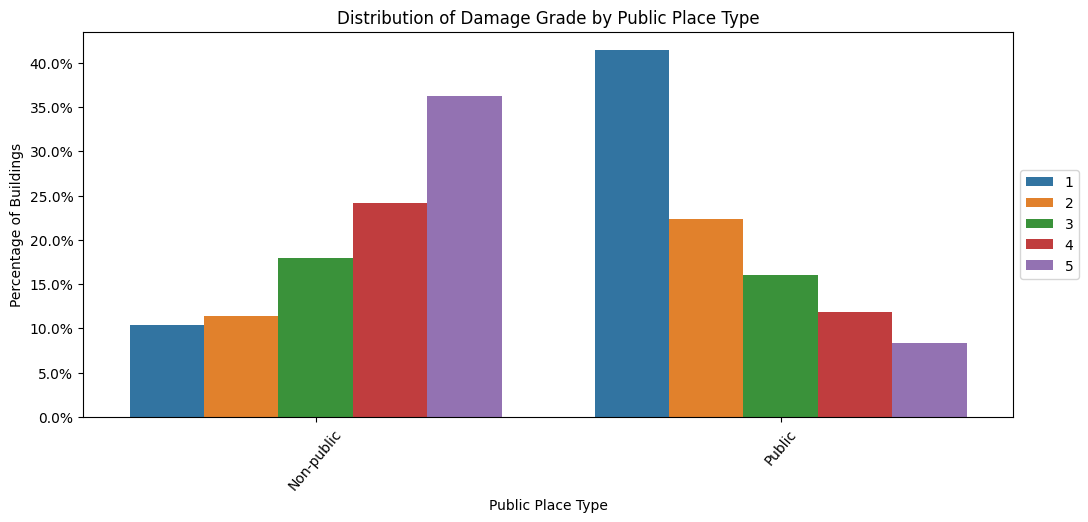

In [ ]:
df_temp = train_raw.groupby(['public_place_type','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['public_place_type', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'public_place_type', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Public Place Type")
plt.xlabel("Public Place Type")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-63-ff6c5cbd0dbf>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


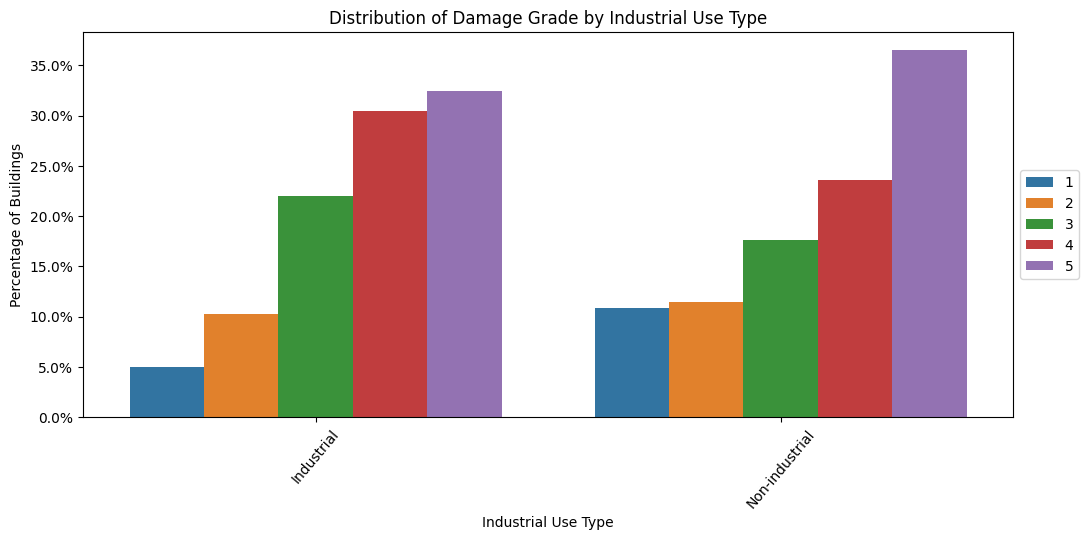

In [ ]:
df_temp = train_raw.groupby(['industrial_use_type','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['industrial_use_type', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'industrial_use_type', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Industrial Use Type")
plt.xlabel("Industrial Use Type")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-64-50ed24422597>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


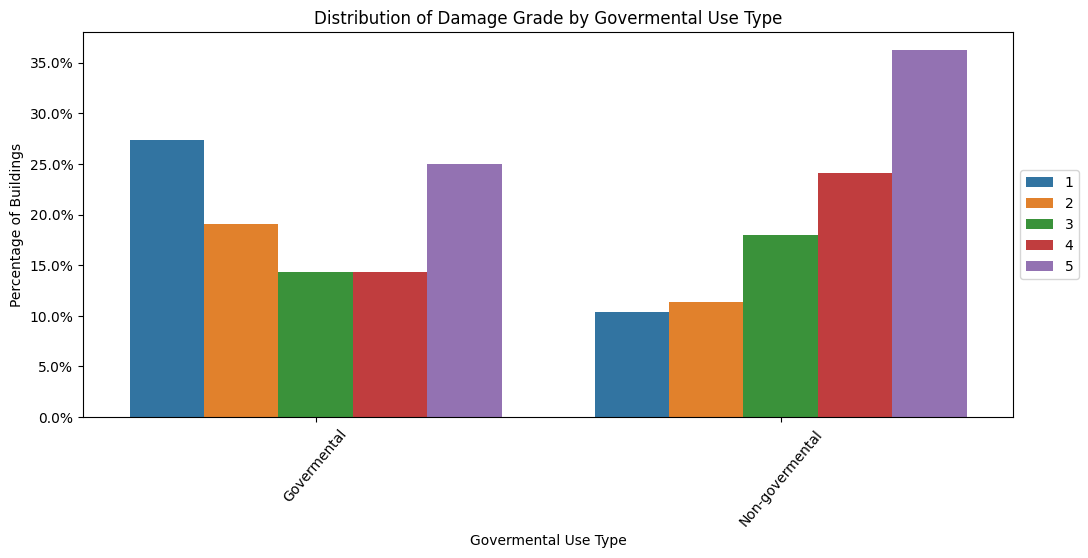

In [ ]:
df_temp = train_raw.groupby(['govermental_use_type','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['govermental_use_type', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'govermental_use_type', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Govermental Use Type")
plt.xlabel("Govermental Use Type")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-65-d3d259bdf8a7>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


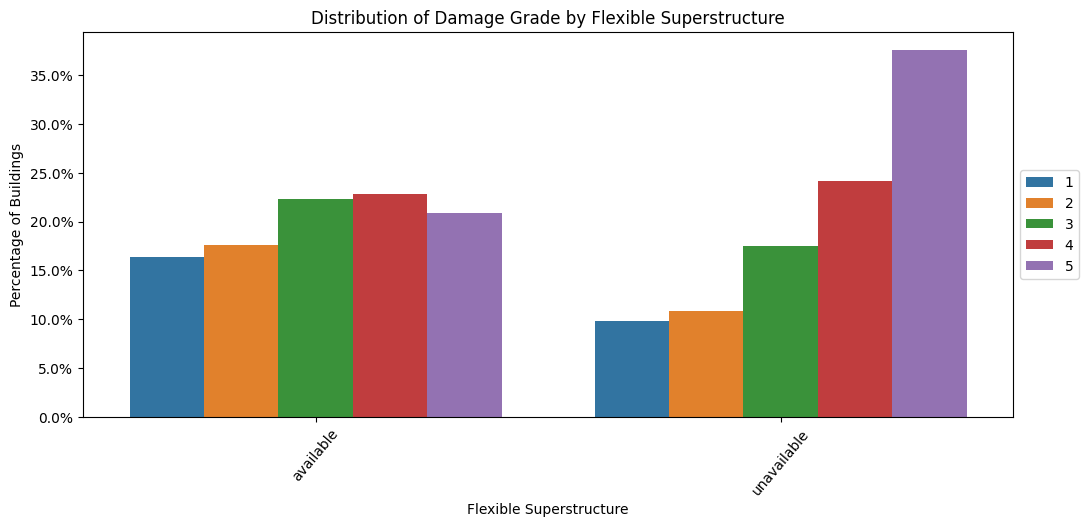

In [ ]:
df_temp = train_raw.groupby(['flexible_superstructure','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['flexible_superstructure', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'flexible_superstructure', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Flexible Superstructure")
plt.xlabel("Flexible Superstructure")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-66-4edc02760a9e>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


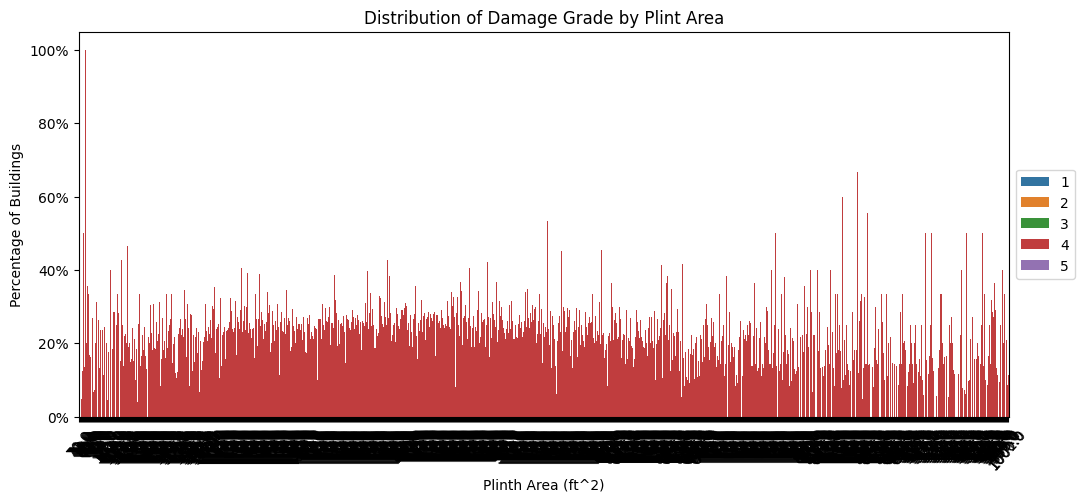

In [ ]:
df_temp = train_raw.groupby(['plinth_area (ft^2)','damage_grade']).size().reset_index(name='count')

df_temp = df_temp.set_index(['plinth_area (ft^2)', 'damage_grade'])

df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'plinth_area (ft^2)', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Plint Area")
plt.xlabel("Plinth Area (ft^2)")
plt.ylabel("Percentage of Buildings")
plt.show()

del df_temp, ax

<ipython-input-67-6e889e8bf21a>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


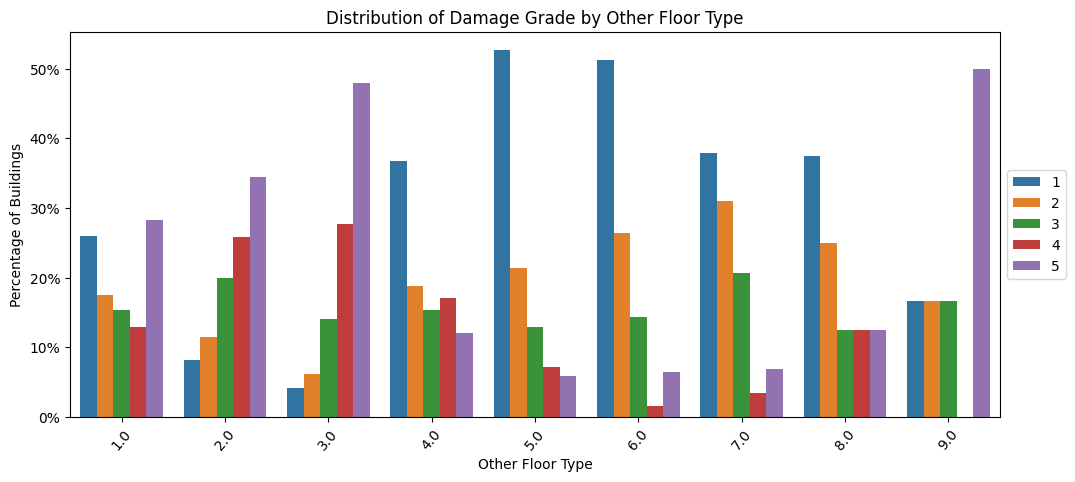

In [ ]:
df_temp = train_raw.groupby(['floors_before_eq (total)','damage_grade']).size().reset_index(name='count')

# Set Index
df_temp = df_temp.set_index(['floors_before_eq (total)', 'damage_grade'])

# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

# Plot char
plt.figure(figsize=(12,5))
ax = sns.barplot(data = df_temp, 
                 x = 'floors_before_eq (total)', 
                 y = 'count', 
                 hue = 'damage_grade')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of Damage Grade by Other Floor Type")
plt.xlabel("Other Floor Type")
plt.ylabel("Percentage of Buildings")
plt.show()

# Clean up
del df_temp, ax

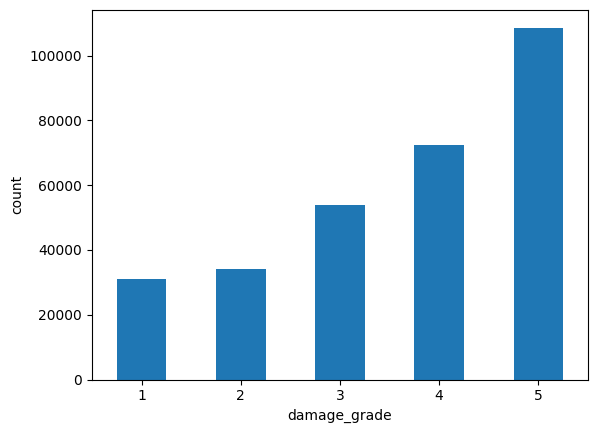

In [ ]:
train_raw['damage_grade'].value_counts().sort_index().plot(kind='bar', rot=0, xlabel='damage_grade',ylabel='count')
plt.show()

<Axes: xlabel='old_building', ylabel='no_building_attached'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


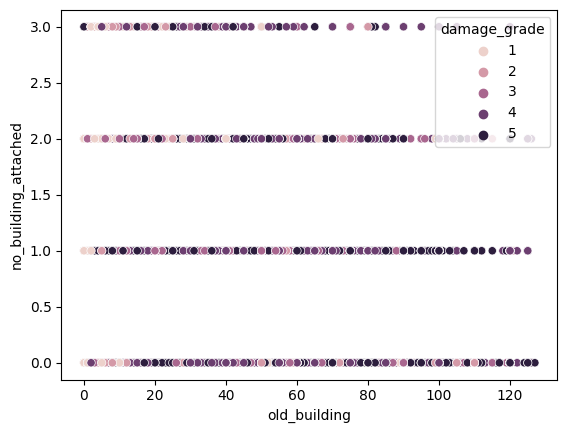

In [ ]:
sns.scatterplot(data=train_raw, x="old_building", y='no_building_attached', hue="damage_grade")

<Axes: xlabel='height_before_eq (ft)', ylabel='floors_before_eq (total)'>

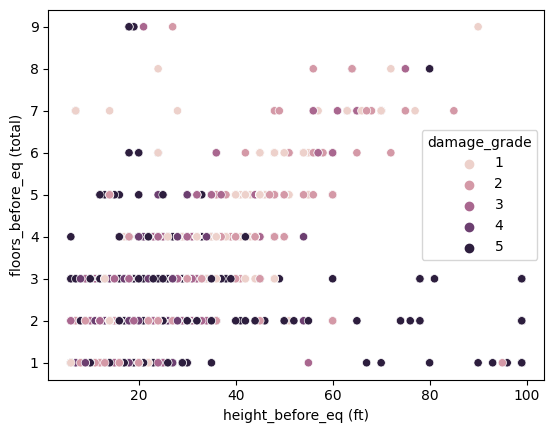

In [ ]:
sns.scatterplot(data=train_raw, x="height_before_eq (ft)", y='floors_before_eq (total)', hue="damage_grade")

<Axes: xlabel='plinth_area (ft^2)', ylabel='damage_grade'>

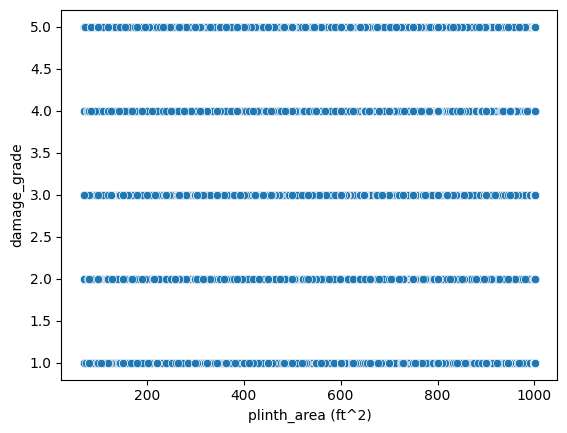

In [ ]:
sns.scatterplot(data=train_raw, x="plinth_area (ft^2)", y="damage_grade")

<Axes: xlabel='old_building', ylabel='damage_grade'>

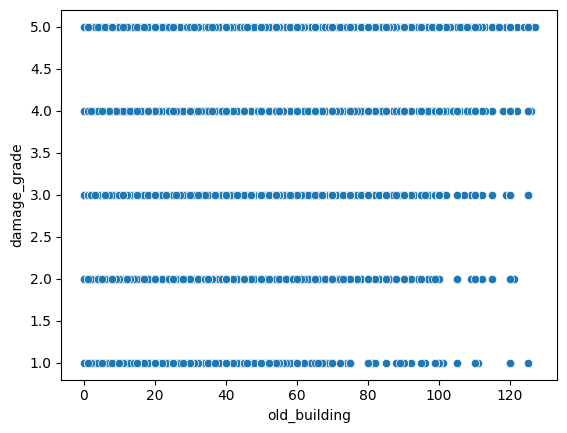

In [ ]:
sns.scatterplot(data=train_raw, x="old_building", y="damage_grade")

<Axes: xlabel='wall_binding', ylabel='wall_material'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


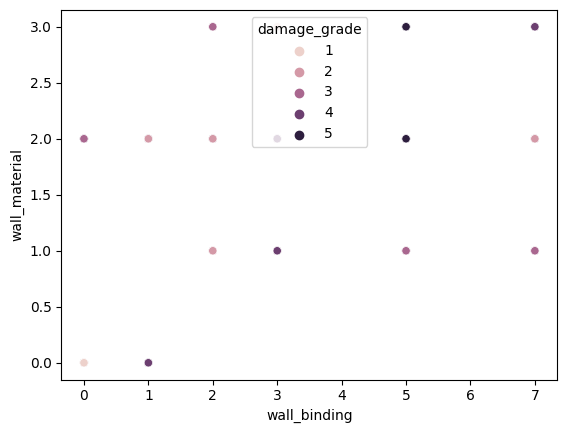

In [ ]:
sns.scatterplot(data=train_raw, x="wall_binding", y='wall_material', hue="damage_grade")

#Prediction

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN 

In [ ]:
categorical=[
    'land_surface_condition',
    'type_of_foundation',
    'type_of_roof',
    'type_of_ground_floor',
    'type_of_other_floor',
    'building_plan_configuration',
    'legal_ownership_status',
    'residential_type',
    'public_place_type',
    'industrial_use_type',
    'govermental_use_type',
    'flexible_superstructure'
]

X = train.drop('damage_grade', axis = 1)
y = train['damage_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

for i in categorical:
    X_train[i]=X_train[i].astype("category")
    X_train[i]=X_train[i].cat.codes

for j in categorical:
    X_test[j]=X_test[j].astype("category")
    X_test[j]=X_test[j].cat.codes

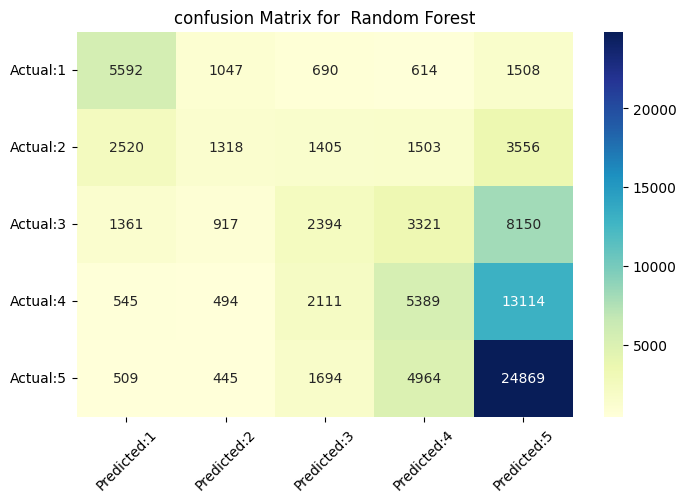

In [ ]:
rf = RandomForestClassifier(n_estimators = 500,random_state = 1, max_depth=None,n_jobs=-1)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
cm=confusion_matrix(y_test,rf_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3', 'Predicted:4', "Predicted:5"],
                                         index=['Actual:1','Actual:2','Actual:3', 'Actual:4', 'Actual:5'])
                                                                            
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

In [ ]:
print("-"*100)
print("F1 Score for Random Forest :",f1_score(y_test,rf_pred, average='macro'))
print("-"*100)
print("\n")
print("classification report for Random Forest :\n\n",classification_report(y_test, rf_pred))
print("-"*100)

----------------------------------------------------------------------------------------------------
F1 Score for Random Forest : 0.36389882888251057
----------------------------------------------------------------------------------------------------


classification report for Random Forest :

               precision    recall  f1-score   support

           1       0.53      0.59      0.56      9451
           2       0.31      0.13      0.18     10302
           3       0.29      0.15      0.20     16143
           4       0.34      0.25      0.29     21653
           5       0.49      0.77      0.59     32481

    accuracy                           0.44     90030
   macro avg       0.39      0.38      0.36     90030
weighted avg       0.40      0.44      0.40     90030

----------------------------------------------------------------------------------------------------


##Prediksi Data Test

In [ ]:
X_test_sample = test

for i in categorical:
    X_test_sample[i]=X_test_sample[i].astype("category")
    X_test_sample[i]=X_test_sample[i].cat.codes

rf_pred=rf.predict(X_test_sample)
X_test_sample['damage_grade'] = rf_pred

sample_data = X_test_sample[['id', 'damage_grade']]

In [ ]:
check_values(sample_data)

,kolom,dataType,null,nullPercentage,unique,values
0,id,int64,0,0.0,242082,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,damage_grade,int64,0,0.0,5,"[5, 4, 1, 3, 2]"


In [ ]:
sample_data.to_csv('sample_submission.csv', index = None, header = True)

<ipython-input-81-f266c6cda44a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


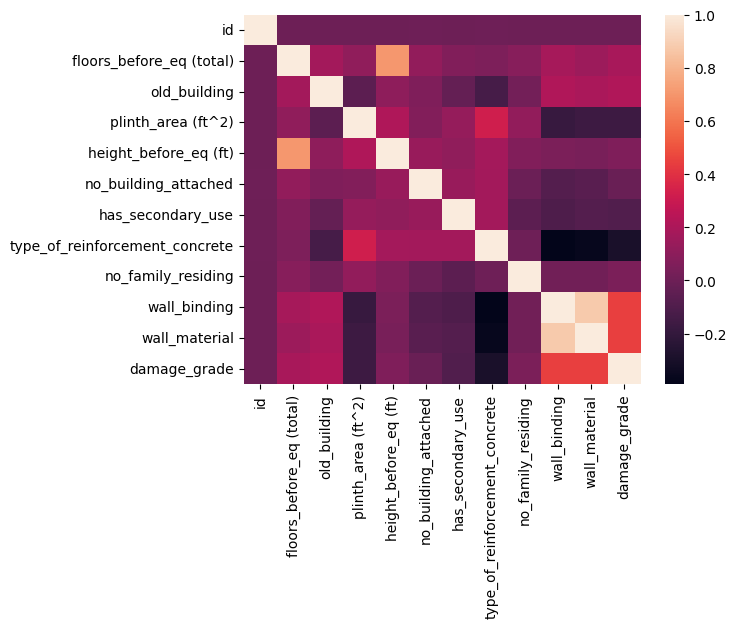

In [ ]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix)
plt.show()